![Plane departing the Pacific Northwest](IMG_8801.JPG)

A prominent airline company in the Pacific Northwest has accumulated extensive data related to flights and weather patterns and needs to understand the factors influencing the departure delays and cancellations to benefit both airlines and passengers. As the data analyst on the team, you decide to embark on this analytical project.

The aviation industry is dynamic with various variables impacting flight operations. To ensure the relevance and applicability of your findings, you choose to focus solely on flights from the 'pnwflights2022' datasets available from the ModernDive team exported as CSV files. These datasets provide comprehensive information on flights departing in the first half of 2022 from both of the two major airports in this region: SEA (Seattle-Tacoma International Airport) and PDX (Portland International Airport): 

- `flights2022.csv` contains information about about each flight including 

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `dep_time`   | Departure time (in the format hhmm) where`NA` corresponds to a cancelled flight        |
| `dep_delay`  | Departure delay, in minutes (negative for early)    |
| `origin`     | Origin airport where flight starts (IATA code)
| `airline`    | Carrier/airline name                        |
| `dest`       | Destination airport where flight lands (IATA code)  

- `flights_weather2022.csv` contains the same flight information as well as weather conditions such as 
 
| Variable   | Description                                           |
|------------|-------------------------------------------------------|
| `visib`      | Visibility (in miles)                                 |
| `wind_gust`  | Wind gust speed (in mph)  

In [137]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Start your code here!
flights2022 = pd.read_csv('flights2022.csv')
flights_weather2022 = pd.read_csv("flights_weather2022.csv")
flights_weather2022

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,airline,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,United Air Lines Inc.,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,Alaska Airlines Inc.,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,Alaska Airlines Inc.,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,Alaska Airlines Inc.,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,United Air Lines Inc.,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111001,2022,6,30,NaN,1155,NaN,NaN,2033,NaN,UA,206,NaN,SEA,EWR,NaN,2402,11,55,United Air Lines Inc.,SEA-EWR,56.0,51.0,83.88,30.0,9.20624,10.594357,0.0,1021.5,10.0
111002,2022,6,30,NaN,1448,NaN,NaN,1732,NaN,DL,323,N3759,SEA,LAX,NaN,954,14,48,Delta Air Lines Inc.,SEA-LAX,60.0,53.0,77.65,20.0,6.90468,7.945768,0.0,1021.9,10.0
111003,2022,6,30,NaN,1751,NaN,NaN,2352,NaN,DL,377,N898DN,SEA,ORD,NaN,1721,17,51,Delta Air Lines Inc.,SEA-ORD,65.0,53.0,65.56,280.0,6.90468,7.945768,0.0,1021.3,10.0
111004,2022,6,30,NaN,1145,NaN,NaN,2029,NaN,DL,114,N876DN,SEA,JFK,NaN,2422,11,45,Delta Air Lines Inc.,SEA-JFK,56.0,51.0,83.88,30.0,9.20624,10.594357,0.0,1021.5,10.0


In [138]:
#create a route column combining origin and dest columns
flights2022['route'] = flights2022['origin'] + '-' + flights2022['dest']
flights2022.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline,route
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.,SEA-IAH
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.,SEA-FAI
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.,SEA-ATL
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.,SEA-ORD
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.,PDX-ORD


In [139]:
#average departure delays and highest number of canceled flights (by routes)
routes_delays_cancels = flights2022.groupby('route').agg(
    mean_dep_delay=('dep_delay', 'mean'),
    total_cancellations=('dep_time', lambda x: x.isna().sum())
)
routes_delays_cancels.reset_index(inplace=True)

#find top9 by delay time and number of cancellations (by routes)
top_routes_by_delay = routes_delays_cancels.sort_values('mean_dep_delay', ascending=False).head(9)
top_routes_by_cancellations = routes_delays_cancels.sort_values('total_cancellations', ascending=False).head(9)

In [140]:
#make it more simple to plot graph with the same options
def plot_g(fig, ax, x, y, title, x_lab, y_lab):
    ax.bar(x, y)
    ax.set_title(title)
    ax.set_xlabel(x_lab)
    ax.set_xticklabels(x, rotation=90)
    ax.set_ylabel(y_lab)
    plt.show()
    plt.clf()

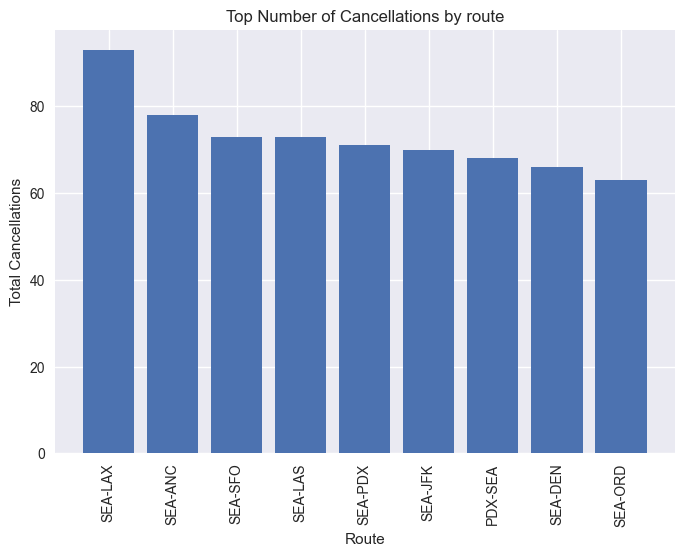

<Figure size 800x550 with 0 Axes>

In [141]:
#graph shows top 9 highest number of cancellations by route
top9_route_cancels_bar, ax = plt.subplots()

#plot_g(fig, ax, x, y, title, x_lab, y_lab)
plot_g(top9_route_cancels_bar,
      ax,
      top_routes_by_cancellations['route'],
      top_routes_by_cancellations['total_cancellations'],
      'Top Number of Cancellations by route',
      'Route',
      'Total Cancellations'
)

In [142]:
#average departure delays and highest number of canceled flights (by airlines)
airlines_delays_cancels = flights2022.groupby('airline').agg(
    mean_dep_delay=('dep_delay', 'mean'),
    total_cancellations=('dep_time', lambda x: x.isna().sum())
)
airlines_delays_cancels.reset_index(inplace=True)

#find top9 by delay time and number of cancellations (by airlines)
top_airlines_by_delay = airlines_delays_cancels.sort_values('mean_dep_delay', ascending=False).head(9)
top_airlines_by_cancellations = airlines_delays_cancels.sort_values('total_cancellations', ascending=False).head(9)

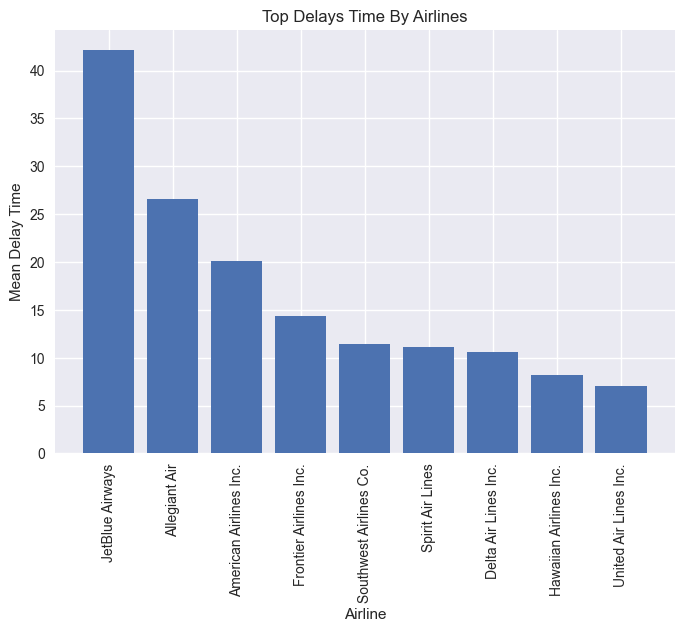

<Figure size 800x550 with 0 Axes>

In [143]:
#graph shows top 9 highest number of cancellations by route
top9_airline_delays_bar, ax = plt.subplots()

#plot_g(fig, ax, x, y, title, x_lab, y_lab)
plot_g(top9_airline_delays_bar,
      ax,
      top_airlines_by_delay['airline'],
      top_airlines_by_delay['mean_dep_delay'],
      'Top Delays Time By Airlines',
      'Airline',
      'Mean Delay Time',
)

In [144]:
# Determine if 10+ mile per hour wind gusts have a larger average departure delay for both of SEA and PDX
flights_weather2022['group'] = flights_weather2022['wind_gust'].apply(lambda x: '>= 10mph' if x >= 10 else '< 10 mph')
wind_grouped_data = flights_weather2022.groupby(['group', 'origin']).agg(
    mean_dep_delay=('dep_delay', 'mean')
)

print(wind_grouped_data)

wind_response = True #data with 10+ mile per hour wind gusts have a larger delay

                 mean_dep_delay
group    origin                
< 10 mph PDX           6.686966
         SEA           7.857595
>= 10mph PDX           9.147024
         SEA           9.231060
